In [4]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('hd_csv.csv')

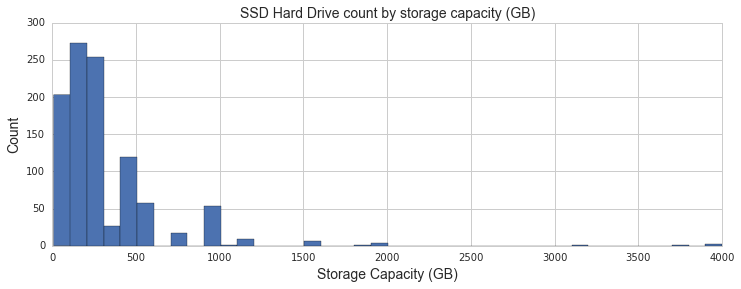

In [134]:
plt.figure(figsize=(12,4))
df[(df.storage_gb>0)&(df.storage_gb<12000)&(df.is_ssd=="Yes")].storage_gb.hist(bins=40)
plt.title('SSD Hard Drive count by storage capacity (GB)', fontsize=14)
plt.xlabel('Storage Capacity (GB)', fontsize=14)
plt.ylabel('Count', fontsize=14)

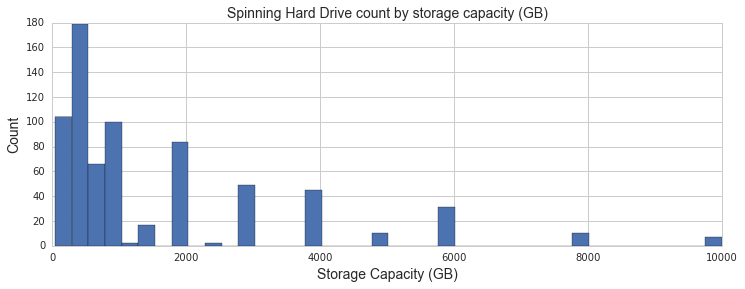

In [78]:
plt.figure(figsize=(12,4))
df[(df.storage_gb>0)&(df.storage_gb<12000)&(df.is_ssd=="No")].storage_gb.hist(bins=40)
plt.title('Spinning Hard Drive count by storage capacity (GB)', fontsize=14)
plt.xlabel('Storage Capacity (GB)', fontsize=14)
plt.ylabel('Count', fontsize=14)

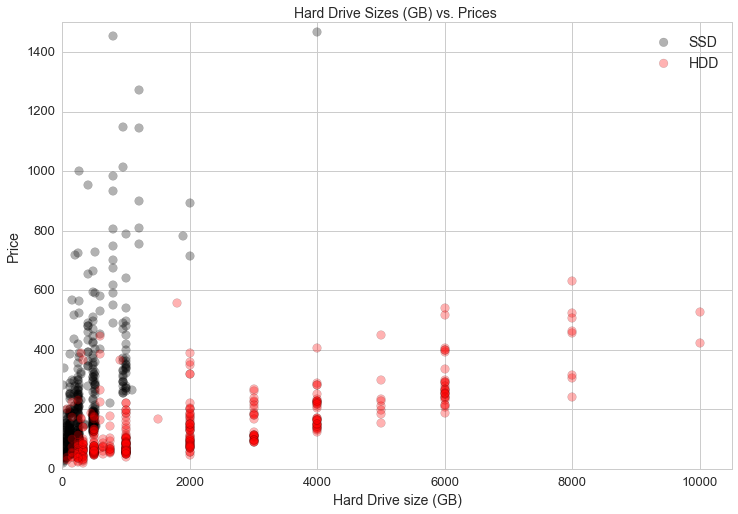

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.axis([0,10500,0,1500])
ssd = df[(df.avg>0)&(df.is_ssd=="Yes")]
hdd = df[(df.avg>0)&(df.is_ssd=="No")]
plt.title('Hard Drive Sizes (GB) vs. Prices ', fontsize=14)
s=75
plt.scatter(ssd.storage_gb, ssd.avg, c='black', s=s, alpha=.3)
plt.scatter(hdd.storage_gb, hdd.avg, c='red', s=s, alpha=.3)
plt.legend(['SSD', 'HDD'], loc='upper right', fontsize=14)
plt.xlabel('Hard Drive size (GB)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/storage/storage_vs_price.png'))

In [7]:
sns.set_style('whitegrid')

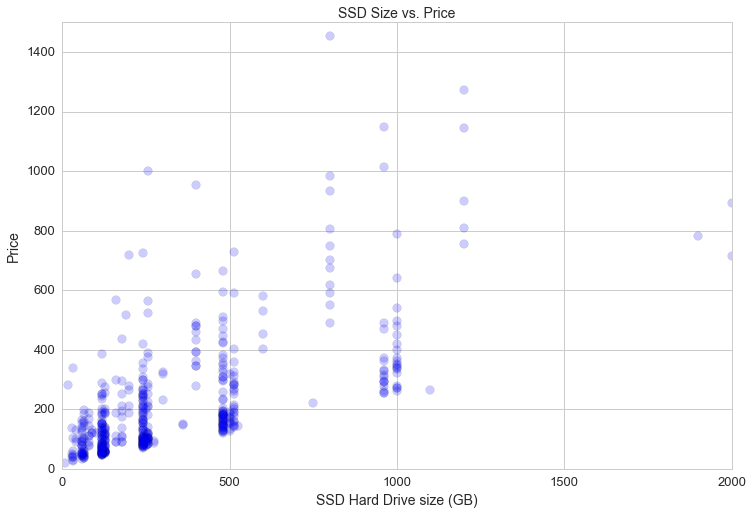

In [11]:
plt.figure(figsize=(12,8))
plt.axis([0,2000,0,1500])
ssd = df[(df.avg>0)&(df.is_ssd=="Yes")]
plt.scatter(ssd.storage_gb, ssd.avg, s=75, alpha=.2)
plt.title('SSD Size vs. Price', fontsize=14)
plt.xlabel('SSD Hard Drive size (GB)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/storage/ssd_storage_vs_price.png'))

In [115]:
df.columns

Index([u'Cache', u'Capacity', u'Form Factor', u'GB/$1.00', u'Hybrid SSD Cache',
       u'Interface', u'Kind', u'Link', u'Manufacturer', u'Model',
       u'NAND Flash Type', u'Name', u'Part #', u'Power Loss Protection',
       u'Price/GB', u'Prices', u'RPM', u'SSD Controller', u'avg',
       u'short_link', u'storage_gb', u'rpm', u'is_ssd', u'ppgb',
       u'form_factor'],
      dtype='object')

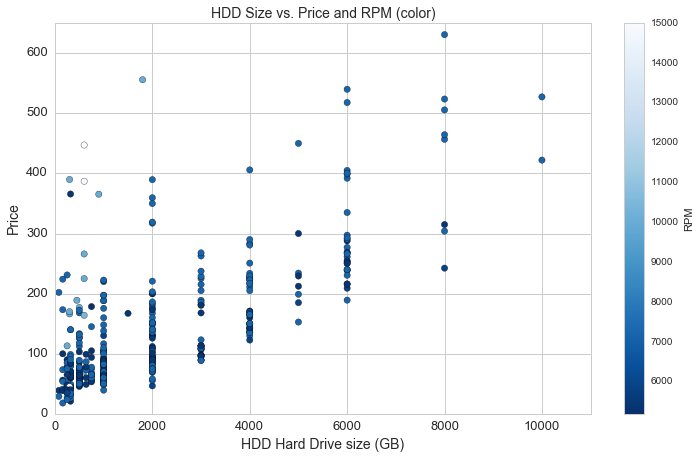

In [15]:
plt.figure(figsize=(12,7))
plt.axis([0,11000,0,650])
hdd = df[(df.avg>0)&(df.is_ssd=="No")&(df.RPM.notnull())]
plt.scatter(hdd.storage_gb, hdd.avg, c=hdd.RPM, s=40, cmap="Blues_r")
plt.colorbar(label='RPM')
plt.title('HDD Size vs. Price and RPM (color)', fontsize=14)
plt.xlabel('HDD Hard Drive size (GB)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/storage/hdd_storage_vs_price.png'))

In [ ]:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

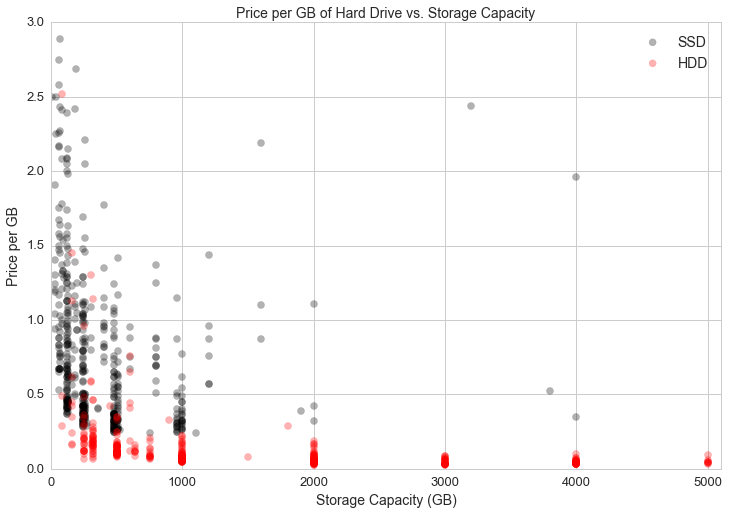

In [21]:

plt.figure(figsize=(12,8))
plt.axis([0,5100,0,3])
a=.3
plt.scatter(ssd.storage_gb,ssd.ppgb, s= 50, alpha=a, color='black')
plt.scatter(hdd.storage_gb,hdd.ppgb, s= 50, alpha=a, color='red')
plt.title('Price per GB of Hard Drive vs. Storage Capacity', fontsize=14)
plt.xlabel('Storage Capacity (GB)', fontsize=14)
plt.ylabel('Price per GB', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['SSD', 'HDD'], loc='upper right', fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/storage/storage_vs_ppgb.png'))

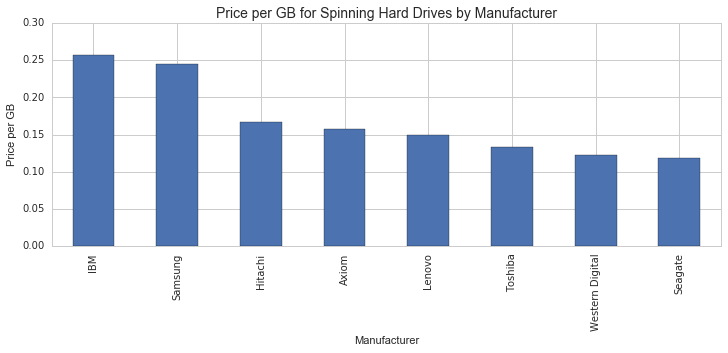

In [92]:
plt.figure(figsize=(12,4))
df[(df.is_ssd=='No')&(df.ppgb>0)].groupby('Manufacturer').ppgb.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Price per GB for Spinning Hard Drives by Manufacturer', fontsize=14)
plt.ylabel('Price per GB', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)

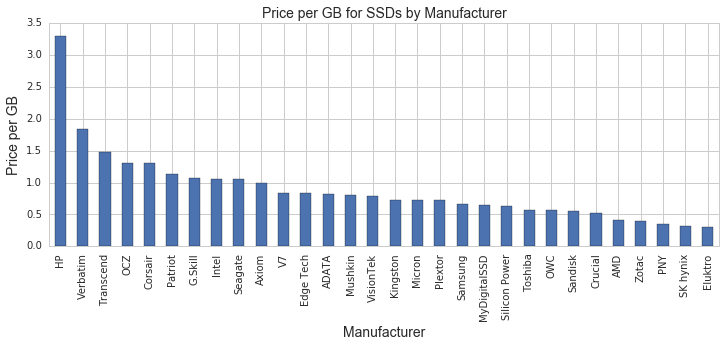

In [123]:
plt.figure(figsize=(12,4))
df[(df.is_ssd=='Yes')&(df.ppgb>0)].groupby('Manufacturer').ppgb.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Price per GB for SSDs by Manufacturer', fontsize=14)
plt.ylabel('Price per GB', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)

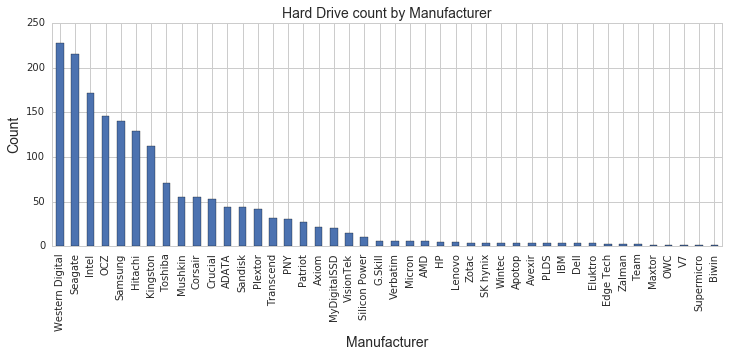

In [100]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
df.Manufacturer.value_counts().plot(kind='bar')
plt.title('Hard Drive count by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [116]:
df['Form_Factor']  = df['Form Factor']

(0, 2)

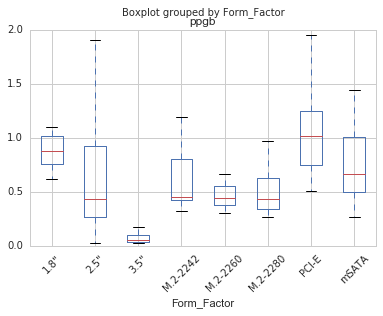

In [121]:
df[df.avg>0].boxplot(column='ppgb', by='Form_Factor', rot=45)
plt.ylim(0,2)

(0, 2)

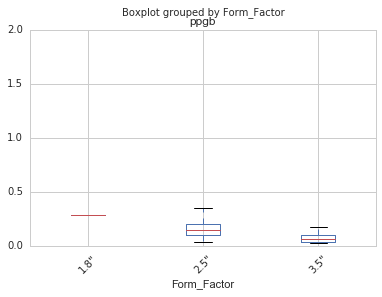

In [125]:
df[(df.avg>0)&(df.is_ssd=="No")].boxplot(column='ppgb', by='Form_Factor', rot=45)
plt.ylim(0,2)

(0, 2)

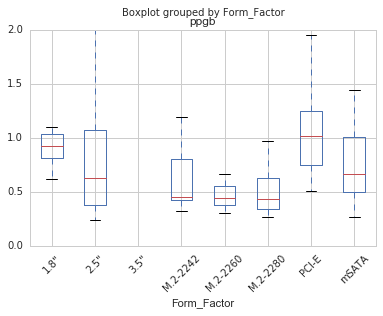

In [126]:
df[(df.avg>0)&(df.is_ssd=="Yes")].boxplot(column='ppgb', by='Form_Factor', rot=45)
plt.ylim(0,2)

(0, 2000)

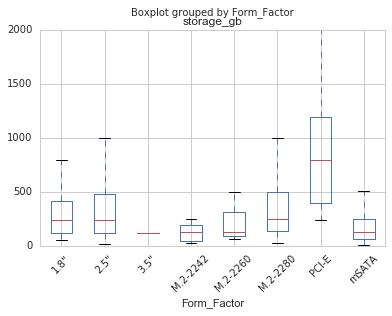

In [129]:
df[(df.avg>0)&(df.is_ssd=="Yes")].boxplot(column='storage_gb', by='Form_Factor', rot=45)
plt.ylim(0,2000)